In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
school2013 = pd.read_csv('2013PreK_final_no_missing_data.csv')

In [4]:
print(len(school2013))

571


# New York City had 574 public pre-school programs in the 2013-2014 school year.
Three schools had no data for full-time vs. part-time seats available, so were removed from the data set. Hence our data set has 571 rows.

In [6]:
print(school2013['Zip'].value_counts())
print(np.median(school2013['Zip'].value_counts()))
print(np.mean(school2013['Zip'].value_counts()))

11207    14
11206    13
11212    12
11233    12
10002    11
         ..
11432     1
11239     1
11427     1
10003     1
10044     1
Name: Zip, Length: 155, dtype: int64
3.0
3.6838709677419357


In the 2013-2014 school year, 155 Zip codes in NYC had public pre-K programs, out of a total of 214 Zip codes in the city. The same school year, the median and mean number of public pre-K programs in these 155 NYC Zip codes were 3 and 3.7, respectively. These figures include both full-time and part-time pre-K.

When we plot the distribution of number of public pre-K location by Zip code, we see that the distribution of pre-K locations is right-skewed. Most Zip codes had a low number of public pre-K sites in the 2013-2014 school year. A few outliers have higher than 6 sites.

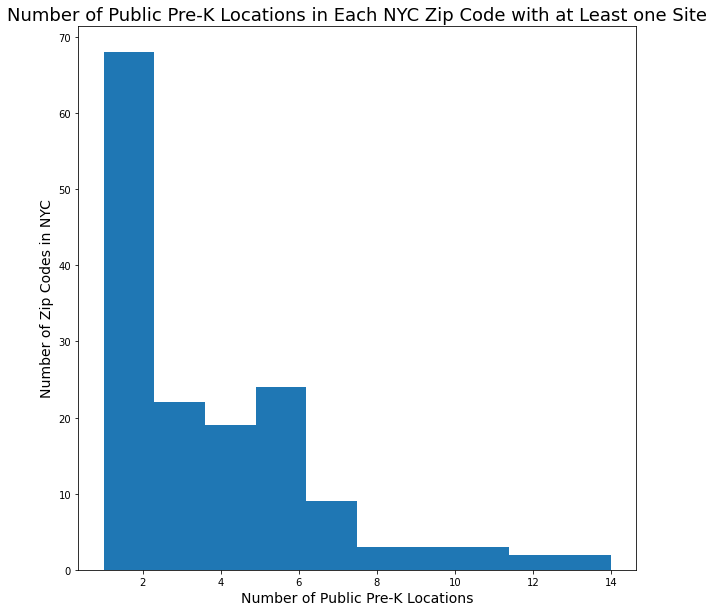

<Figure size 432x288 with 0 Axes>

In [42]:
fig5, ax5 = plt.subplots(figsize=(10,10))
plt.hist(school2013['Zip'].value_counts())
plt.xlabel('Number of Public Pre-K Locations', fontsize=14)
plt.ylabel('Number of Zip Codes in NYC', fontsize=14)
plt.title('Number of Public Pre-K Locations in Each NYC Zip Code with at Least one Site', fontsize=18)
plt.show()
plt.clf()

In [11]:
#I want to create a new column called "borough" that assigns a value for each row based on its school district.

borough = []
for row in school2013['District']:
    if row == 1:
        borough.append('Manhattan')
    if row == 2:
        borough.append('Manhattan')
    if row == 3:
        borough.append('Manhattan')
    if row == 4:
        borough.append('Manhattan')
    if row == 5:
        borough.append('Manhattan')
    if row == 6:
        borough.append('Manhattan')
    if row == 7:
        borough.append('Bronx')
    if row == 8:
        borough.append('Bronx')
    if row == 9:
        borough.append('Bronx')
    if row == 10:
        borough.append('Bronx')
    if row == 11:
        borough.append('Bronx')
    if row == 12:
        borough.append('Bronx')
    if row == 13:
        borough.append('Brooklyn')
    if row == 14:
        borough.append('Brooklyn')
    if row == 15:
        borough.append('Brooklyn')
    if row == 16:
        borough.append('Brooklyn')
    if row == 17:
        borough.append('Brooklyn')
    if row == 18:
        borough.append('Brooklyn')
    if row == 19:
        borough.append('Brooklyn')
    if row == 20:
        borough.append('Brooklyn')
    if row == 21:
        borough.append('Brooklyn')
    if row == 22:
        borough.append('Brooklyn')
    if row == 23:
        borough.append('Brooklyn')
    if row == 32:
        borough.append('Brooklyn')
    if row == 24:
        borough.append('Queens')
    if row == 25:
        borough.append('Queens')
    if row == 26:
        borough.append('Queens')
    if row == 27:
        borough.append('Queens')
    if row == 28:
        borough.append('Queens')
    if row == 29:
        borough.append('Queens')
    if row == 30:
        borough.append('Queens')
    if row == 31:
        borough.append('Staten Island')

school2013['borough'] = borough

I'd like to identify the percentage of NYC Zip codes that do not have any full-time public pre-K in the 2013-2013 school year. I will represent this as a pie chart.

In [13]:
full_time_yes = []
for row in school2013['2013-2014 FD']:
    if row > 0:
        full_time_yes.append(1)
    else:
        full_time_yes.append(0)

In [14]:
school2013['full_time_yes'] = full_time_yes

In [15]:
print(school2013['full_time_yes'].value_counts())

1    438
0    133
Name: full_time_yes, dtype: int64


In [16]:
ft_yes = school2013[school2013['full_time_yes'] == 1]
ft_no = school2013[school2013['full_time_yes'] == 0]


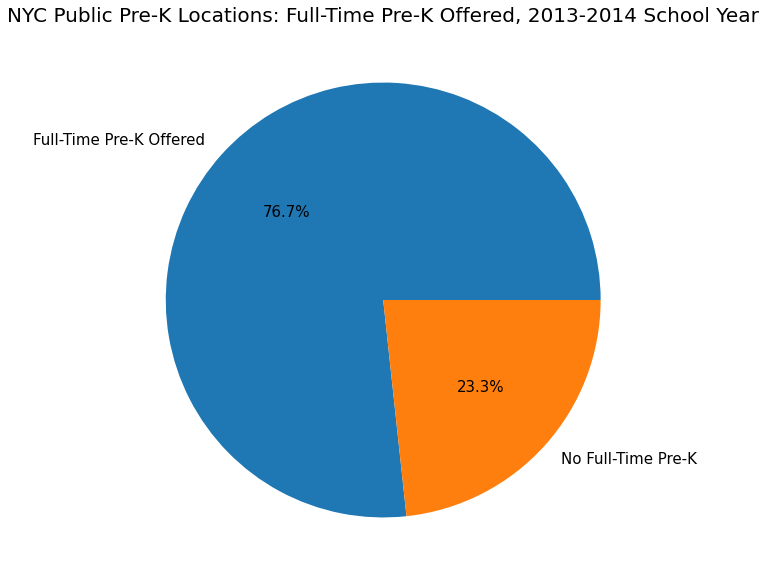

<Figure size 432x288 with 0 Axes>

In [17]:
fig3, ax3 = plt.subplots(figsize=(10,10))
plt.pie([len(ft_yes), len(ft_no)], labels=['Full-Time Pre-K Offered', 'No Full-Time Pre-K'], autopct = "%0.1f%%", textprops={'fontsize': 15})
plt.title('NYC Public Pre-K Locations: Full-Time Pre-K Offered, 2013-2014 School Year', fontsize=20)
plt.show()
plt.clf()

Almost a quarter of public pre-K locations in New York City did not offer full-time instruction during the 2013-2014 school year.

In [19]:


print(len(ft_yes['Zip'].unique()))
print(len(school2013['Zip'].unique()))
print(round(128/155, 2))
print(round(128/214, 2))

128
155
0.83
0.6


## We find that there are 128 Zip codes in New York City with at least one full-day, public pre-K offering. 
That translates to 83% of Zip codes with any public pre-K (155), and 60% of all Zip codes in New York City (214).

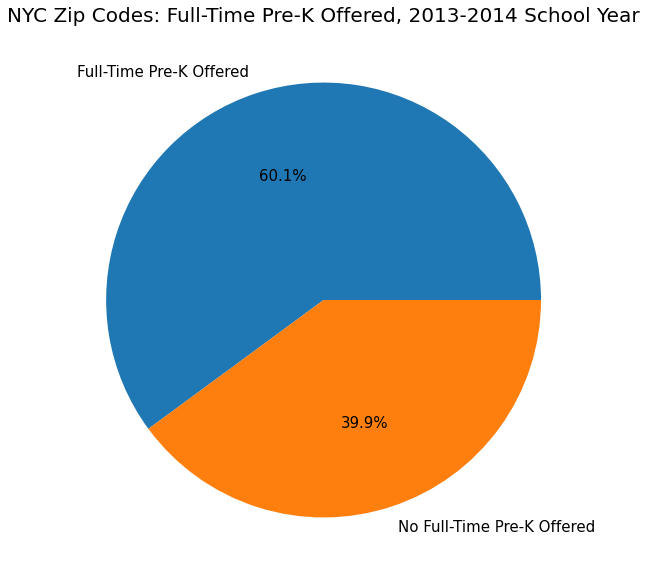

<Figure size 432x288 with 0 Axes>

In [21]:
fig4, ax4 = plt.subplots(figsize=(10,10))
plt.pie([len(ft_yes['Zip'].unique()), len(ft_no['Zip'].unique())], labels=['Full-Time Pre-K Offered', 'No Full-Time Pre-K Offered'], autopct='%0.1f%%', textprops={'fontsize': 15})
plt.title('NYC Zip Codes: Full-Time Pre-K Offered, 2013-2014 School Year', fontsize=20)
plt.show()
plt.clf()

## Over two-thirds of Zip codes in New York City did not offer full-time public Pre-K during the 2013-2014 school year.

In [23]:
schools_by_borough = school2013.groupby('borough')['School Name'].count().reset_index(name='schools').sort_values(['schools'], ascending=False)

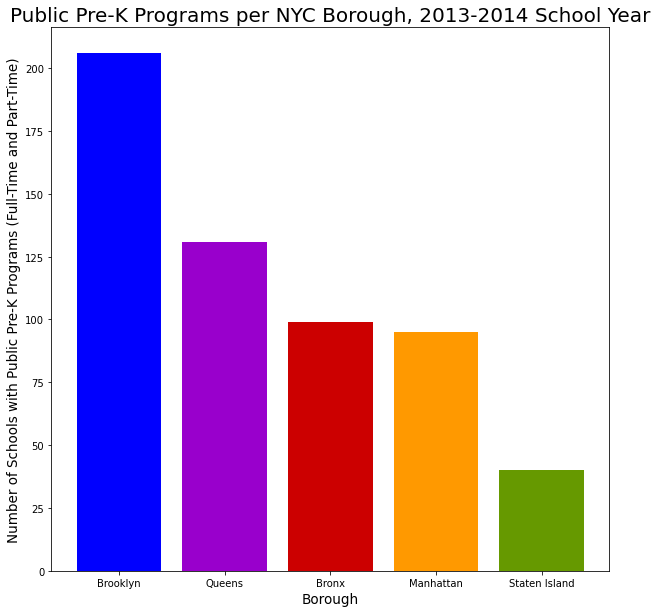

<Figure size 432x288 with 0 Axes>

In [24]:
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.bar(range(len(schools_by_borough['schools'])), schools_by_borough['schools'], color=['#0000ff', '#9900cc', '#cc0000', '#ff9900', '#669900'])
ax1.set_xticks(range(len(schools_by_borough['borough'])))
ax1.set_xticklabels(schools_by_borough['borough'])
plt.title('Public Pre-K Programs per NYC Borough, 2013-2014 School Year', fontsize=20)
plt.xlabel('Borough', fontsize=13.5)
plt.ylabel('Number of Schools with Public Pre-K Programs (Full-Time and Part-Time)', fontsize=13.5)
plt.show()
plt.clf()

In [25]:
ft_yes_by_borough = ft_yes.groupby('borough')['School Name'].count().reset_index(name='schools').sort_values(['schools'], ascending=False)

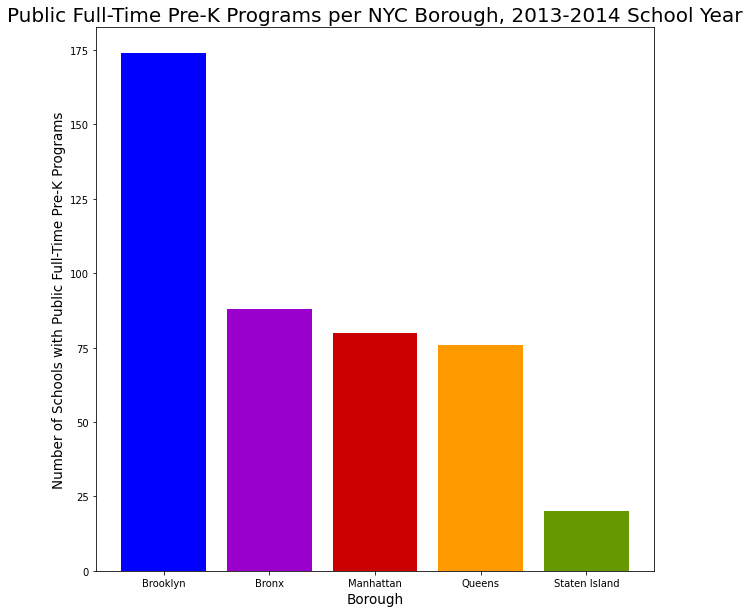

<Figure size 432x288 with 0 Axes>

In [26]:
fig2, ax2 = plt.subplots(figsize=(10,10))
plt.bar(range(len(ft_yes_by_borough['schools'])), ft_yes_by_borough['schools'], color=['#0000ff', '#9900cc', '#cc0000', '#ff9900', '#669900'])
ax2.set_xticks(range(len(ft_yes_by_borough['borough'])))
ax2.set_xticklabels(ft_yes_by_borough['borough'])
plt.title('Public Full-Time Pre-K Programs per NYC Borough, 2013-2014 School Year', fontsize=20)
plt.xlabel('Borough', fontsize=13.5)
plt.ylabel('Number of Schools with Public Full-Time Pre-K Programs', fontsize=13.5)
plt.show()
plt.clf()

In [56]:
print(ft_yes_by_borough['schools'])

1    174
0     88
2     80
3     76
4     20
Name: schools, dtype: int64


## When we include only full-time public pre-K sites, Queens goes from the borough with the second-highest number of public pre-K sites to the borough with the second-lowest number.

We will now conduct a similar analysis on the public pre-K schools in New York City in 2018. Our goal is to probe the effect of Universal Pre-K on the provision of public full-time pre-K in the city.

In [30]:
school2018 = pd.read_csv('2018_UPK_final.csv')

In [32]:
print(len(school2018))
print(len(school2018)/len(school2013))

1789
3.1330998248686517


## The number of public pre-K programs increased from 573 to 1789, more than a threefold increase. Clearly UPK led to an increase in the raw number of pre-K programs in New York. How did it affect their distribution?

In [34]:
print(school2018.columns)

Index(['district', 'schooldbn', 'locationname', 'final_address', 'borough',
       'phone', 'Full-Day?', 'Postcode', 'Full-Day 2?'],
      dtype='object')


In [35]:
print(school2018['Postcode'].value_counts())
print(np.median(school2018['Postcode'].value_counts()))
print(np.mean(school2018['Postcode'].value_counts()))

10457    33
10029    32
11221    26
11368    26
10002    25
         ..
10075     1
10022     1
10017     1
10282     1
10280     1
Name: Postcode, Length: 174, dtype: int64
9.0
10.281609195402298


We can see that there are more ZIP codes with public pre-K in 2018 (174) than 2013 (155). We also see that there tend to be more pre-K programs in each ZIP code in 2018 (mean 10.3) than in 2013 (mean 3.7).

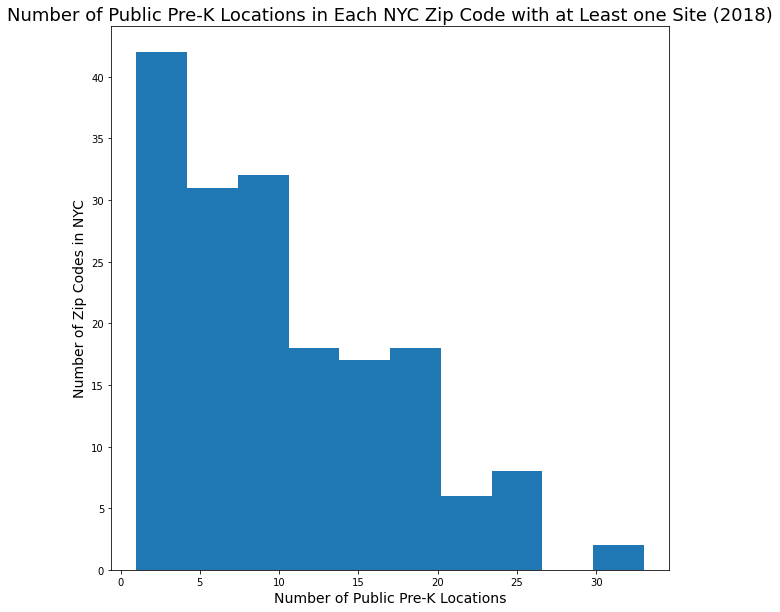

<Figure size 432x288 with 0 Axes>

In [37]:
fig6, ax6 = plt.subplots(figsize=(10,10))
plt.hist(school2018['Postcode'].value_counts())
plt.xlabel('Number of Public Pre-K Locations', fontsize=14)
plt.ylabel('Number of Zip Codes in NYC', fontsize=14)
plt.title('Number of Public Pre-K Locations in Each NYC Zip Code with at Least one Site (2018)', fontsize=18)
plt.show()
plt.clf()

While the distribution of public pre-K sites is still right-skewed in 2018, it is also closer to a normal distribution than in 2013. We also see that a greater number of NYC Zip codes had a greater number of public pre-K options by 2018, compared to 2013.

In [38]:
print(school2018['Full-Day 2?'].value_counts())

Yes    1726
No       63
Name: Full-Day 2?, dtype: int64


In [39]:
ft_yes_2 = school2018[school2018['Full-Day 2?'] == 'Yes']
ft_no_2 = school2018[school2018['Full-Day 2?'] == 'No']

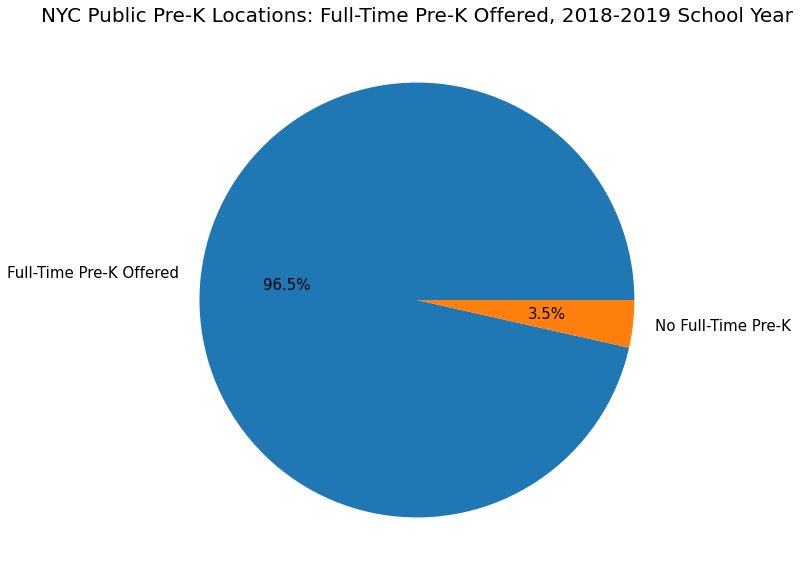

<Figure size 432x288 with 0 Axes>

In [40]:
fig7, ax7 = plt.subplots(figsize=(10,10))
plt.pie([len(ft_yes_2), len(ft_no_2)], labels=['Full-Time Pre-K Offered', 'No Full-Time Pre-K'], autopct = "%0.1f%%", textprops={'fontsize': 15})
plt.title('NYC Public Pre-K Locations: Full-Time Pre-K Offered, 2018-2019 School Year', fontsize=20)
plt.show()
plt.clf()

## Between 2013 and 2018, the percentage of pre-K sites offering full-day instruction increased dramatically, from about three-quarters to over 95%.

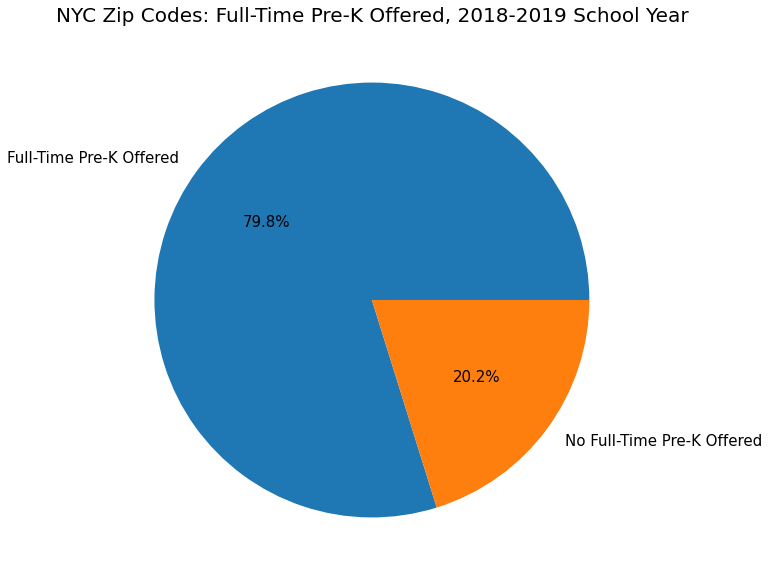

<Figure size 432x288 with 0 Axes>

In [64]:
fig8, ax8 = plt.subplots(figsize=(10,10))
plt.pie([len(ft_yes_2['Postcode'].unique()), len(ft_no_2['Postcode'].unique())], labels=['Full-Time Pre-K Offered', 'No Full-Time Pre-K Offered'], autopct='%0.1f%%', textprops={'fontsize': 15})
plt.title('NYC Zip Codes: Full-Time Pre-K Offered, 2018-2019 School Year', fontsize=20)
plt.show()
plt.clf()

The percentage of ZIP codes in New York City with both any public pre-k and full-time public pre-K also increased between 2013 and 2018, from about 60% to about 80%.

Now we will compare the number of full-time public pre-K options by borough in 2013-2014 vs. 2018-2019.

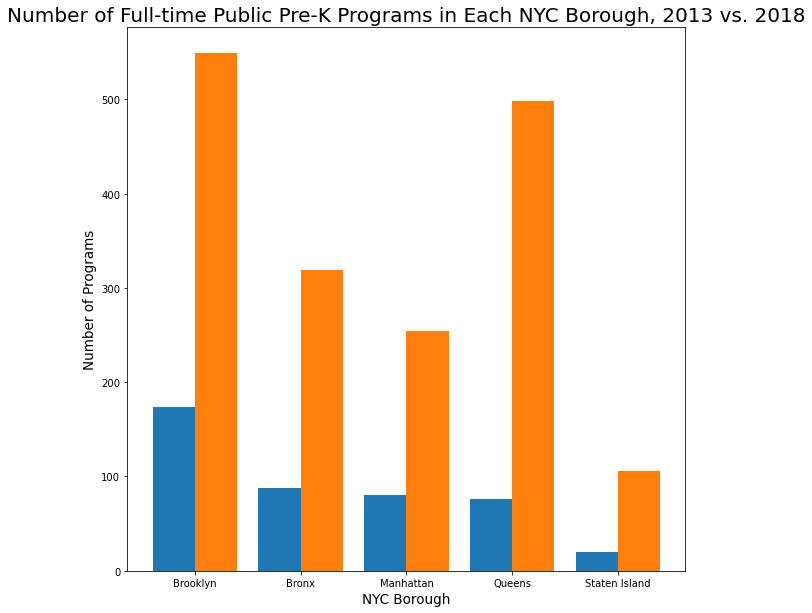

<Figure size 432x288 with 0 Axes>

In [67]:
ft_yes_by_borough2 = ft_yes_2.groupby('borough')['locationname'].count().reset_index(name='schools').sort_values(['schools'], ascending=False)
Y_2018 = ft_yes_by_borough2.schools.values.tolist()
Y_2013 = ft_yes_by_borough.schools.values.tolist()
Y_2018_order = [Y_2018[0], Y_2018[2], Y_2018[3], Y_2018[1], Y_2018[4]]

X = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']
X_axis = np.arange(len(X))

fig8, ax8 = plt.subplots(figsize=(10,10))
plt.bar(X_axis - 0.2, Y_2013, 0.4, label='2013')
plt.bar(X_axis + 0.2, Y_2018_order, 0.4, label='2018')
plt.xticks(X_axis, X)
plt.title('Number of Full-time Public Pre-K Programs in Each NYC Borough, 2013 vs. 2018', fontsize=20)
plt.ylabel('Number of Programs', fontsize=13.5)
plt.xlabel('NYC Borough', fontsize=13.5)
plt.show()
plt.clf()


## Growth in full-time pre-K programs was most dramatic in Brooklyn and Queens.
All boroughs saw a large increase in the number of full-time public pre-K programs since the start of UPK until five school years after its introduction.

## Conclusions and further research

The introduction of Universal Pre-K led to an explosion of public pre-K offered in New York City. In every borough, the number of full-time public pre-K programs rose dramatically over the five years following the beginning of UPK. Brooklyn and Queens saw the largest increases out of the boroughs.

Further researchers may consider identifying the Zip codes that went from 0 full-day public pre-K sites to at least 1 after the beginning of UPK. These geographical areas may share noteworthy demographic and/or socioeconomic indicators, which may offer insights for educational policy makers. It may also be worthwhile to extend the descriptive analysis farther in time beyond 2019 -- for example, to investigate how COVID-19 influenced the provision of full-day public pre-K across New York City.